# 尤度

----

In [2]:
import numpy as np
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

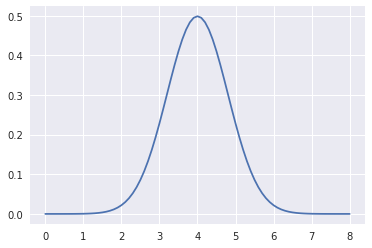

In [80]:
# 真の母集団分布として、平均 4, 標準偏差 0.8 の正規分布を考える
norm_dist = stats.norm(loc=4, scale=0.8)

x = np.arange(0, 8.1, 0.1)
plt.plot(x, norm_dist.pdf(x=x))

[ 5.41124188  4.32012577  4.78299039  5.79271456  5.49404639  3.2181777
  4.76007073  3.87891423  3.91742492  4.3284788 ]


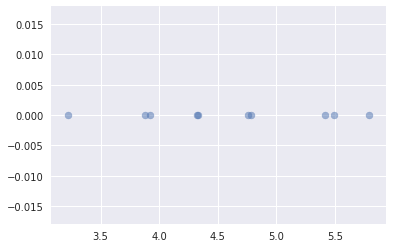

In [17]:
# サンプルサイズ 10 の標本
samples = norm_dist.rvs(size=10, random_state=0)
print(samples)

plt.scatter(samples, np.zeros_like(samples), s=50, alpha=0.5)

----
## 尤度・対数尤度のシミュレーション

母集団分布として正規分布を仮定し、母平均・母分散を人の手で推移させながら、標本との位置関係を確認していく。

そして仮の母数の推移に伴う尤度・対数尤度の値を確認する。

In [116]:
# 指定された標本データ・平均・標準偏差からグラフを描画する
def norm_dist_simulator(samples, mu=0, sigma=1):

    norm_dist = stats.norm(loc=mu, scale=sigma**2)

    min_x = mu - 4 * sigma
    max_x = mu + 4 * sigma

    x = np.linspace(min_x, max_x, 201)
    y = norm_dist.pdf(x=x)

    # 尤度・対数尤度
    L = np.prod([norm_dist.pdf(x=x_i) for x_i in samples])
    l = np.log(L)

    plt.figure(figsize=(8,5))
    plt.xlim(min_x, 8)
    plt.ylim(-0.01,max(y)*1.1)
    plt.title('mu:{:.3f}, sigma:{:.3f}'.format(mu, sigma))

    # 指定した母数の正規分布
    plt.plot(x,y)

    # 標本データ
    plt.scatter(samples, np.zeros_like(samples), s=50, alpha=0.5)
    for x in samples:
        plt.plot([x, x], [0, norm_dist.pdf(x=x)], linestyle='--', c='gray', lw=0.8)

    print('Likelihood:{:.6f}\nLog Likelihood:{:.6f}\n'.format(L, l))

----

### ①平均 0, 分散 1 の正規分布（標準正規分布）

Likelihood:0.000000
Log Likelihood:-117.541872



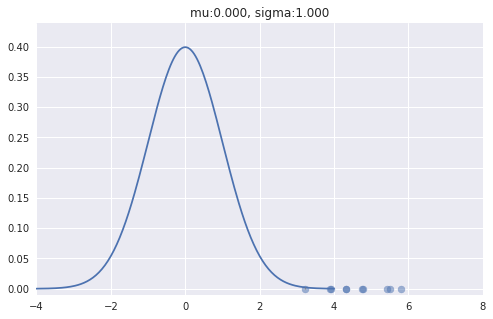

In [117]:
norm_dist_simulator(samples)

### ②平均 2, 分散 1 の正規分布

Likelihood:0.000000
Log Likelihood:-45.733501



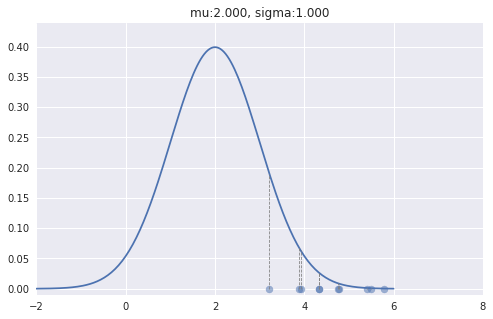

In [118]:
norm_dist_simulator(samples, 2, 1)

### ③平均 3, 分散 1 の正規分布

Likelihood:0.000000
Log Likelihood:-24.829316



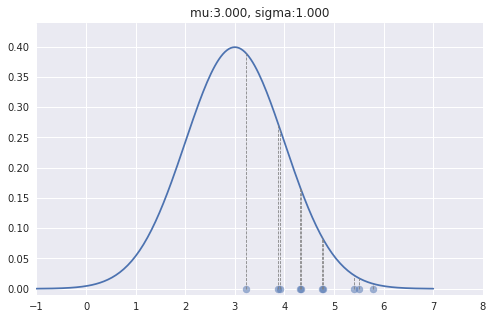

In [119]:
norm_dist_simulator(samples, 3, 1)

### ④平均 3.5, 分散 0.9 の正規分布

Likelihood:0.000000
Log Likelihood:-20.704851



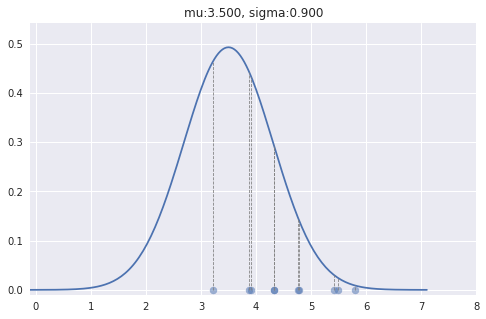

In [120]:
norm_dist_simulator(samples, 3.5, 0.9)

### ⑤平均 3.8, 分散 0.85 の正規分布

Likelihood:0.000000
Log Likelihood:-17.656457



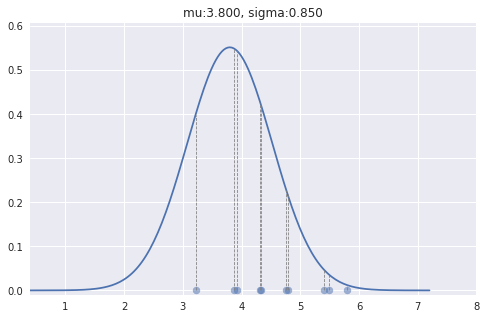

In [121]:
norm_dist_simulator(samples, 3.8, 0.85)

### ⑥標本に合わせた正規分布

Likelihood:0.000007
Log Likelihood:-11.876917



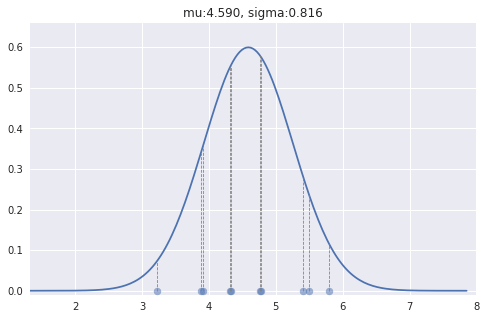

In [123]:
norm_dist_simulator(samples, sp.mean(samples), sp.std(samples, ddof=1))

標本にぴったりな確率分布を推定してはじめて尤度の値に変化が見られた。